# Car Insurance Claim Prediction Analysis

<img src = 'car_collision.jpg' width="600" height="300">

## Overview
Car insurance offers protection against accidents, theft, natural calamities & other unforeseen circumstances that could harm your vehicle. Having a good motor insurance policy ensures that you and your car are protected from the financial losses of these unfortunate events.
Government has also made it compulsory to have vehicle insurance to drive cars on roads.

### Problem Statement
Imagine you work at a bank in your city as a Data Scientist, your bank besides usual services also provides car insurance services. The bank has potential customers data and bank employees call them for advertising available car insurance options.
You are provided with general information about clients (age,job,etc.) as well as more specific information about the current insurance sell campaign (communication,last contact day) and previous campaign (attributes like previous attempts,outcome etc)
You have data about 3100 customers who were contacted during the last campaign and for whom the results of the campaign (if the customer bought insurance or not) are known.

### Objective
You are provided 935 customers data who were contacted during the current campaign. You are required to build a machine learning model to predict if these customers will buy the car insurance or not

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.feature_selection import SelectFromModel

### Loading Data

In [9]:
train = pd.read_csv("C:/Users/HP/Downloads/Pandas project/Train_data.csv")

In [13]:
test = pd.read_csv("C:/Users/HP/Downloads/Pandas project/Test_data.csv")

In [14]:
train.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,NaN,10:22:20,10:24:29,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,09:06:30,13:59:48,1
2,36.000000,services,single,NaN,0,281.000000,1,0,NaN,16,may,1,-1,0,NaN,13:18:41,13:27:16,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,NaN,10:09:18,10:21:48,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,12:12:30,12:27:14,1


## Data Preprocessing

First, we take a look at how the data set is structured. Then we carry out preprocessing steps like clean of missing values, data type that was wrongly assigned, then we use dummy variables to perform one Hot Encoding on some features.

In [109]:
print(train.info("all"), " \n \n  TEST")
print(test.info("all"))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3102 entries, 0 to 3101
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  3102 non-null   float64
 1   job_type             3091 non-null   object 
 2   marital_status       3102 non-null   object 
 3   education_level      2989 non-null   object 
 4   default_or_not       3102 non-null   int64  
 5   balance_amt          3102 non-null   float64
 6   household_insurance  3102 non-null   int64  
 7   car_loan             3102 non-null   int64  
 8   communication        2559 non-null   object 
 9   last_contact_day     3102 non-null   int64  
 10  last_contact_month   3102 non-null   object 
 11  no_of_contacts       3102 non-null   int64  
 12  days_passed          3102 non-null   int64  
 13  prev_attempts        3102 non-null   int64  
 14  Outcome              751 non-null    object 
 15  call_start           3102 non-null   o

In [110]:
test.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
0,65.000000,retired,married,secondary,0,20806.0,0,0,telephone,8,apr,2,-1,0,NaN,12:22:13,12:30:56
1,36.000000,management,married,tertiary,0,900.0,1,0,NaN,15,may,2,-1,0,NaN,17:59:45,18:07:40
2,37.000000,management,married,tertiary,0,6771.0,0,0,cellular,7,sep,1,186,1,success,14:05:19,14:10:56
3,30.065066,management,single,tertiary,0,0.0,0,0,cellular,14,may,2,-1,0,NaN,17:33:27,09:47:54
4,41.000000,management,married,tertiary,0,328.0,1,0,cellular,29,jul,12,-1,0,NaN,14:40:26,14:41:31


In [111]:
train.describe(include="all")

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end,car_insurance
count,3102.000000,3091,3102,2989,3102.000000,3102.000000,3102.000000,3102.000000,2559,3102.000000,3102,3102.000000,3102.000000,3102.000000,751,3102,3102,3102.000000
unique,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,2309,2321,NaN
top,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,failure,09:14:41,17:13:02,NaN
freq,NaN,724,1864,1569,NaN,NaN,NaN,NaN,2397,NaN,770,NaN,NaN,NaN,309,6,8,NaN
mean,41.325847,NaN,NaN,NaN,0.014507,1543.067240,0.465184,0.114442,NaN,15.353965,NaN,2.356867,52.419084,0.792392,NaN,NaN,NaN,0.567376
std,11.517698,NaN,NaN,NaN,0.119587,3301.474598,0.498867,0.318399,NaN,8.164255,NaN,2.594238,109.231364,2.224740,NaN,NaN,NaN,0.495520
min,18.000000,NaN,NaN,NaN,0.000000,-3058.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
25%,32.000000,NaN,NaN,NaN,0.000000,123.821352,0.000000,0.000000,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN,0.000000
50%,39.000000,NaN,NaN,NaN,0.000000,589.000000,0.000000,0.000000,NaN,15.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN,NaN,1.000000
75%,49.000000,NaN,NaN,NaN,0.000000,1696.000000,1.000000,0.000000,NaN,21.000000,NaN,3.000000,56.750000,1.000000,NaN,NaN,NaN,1.000000


In [112]:
test.describe(include="all")

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,call_start,call_end
count,935.000000,930,935,901,935.000000,935.000000,935.000000,935.000000,770,935.000000,935,935.000000,935.000000,935.000000,240,935,935
unique,NaN,11,3,3,NaN,NaN,NaN,NaN,2,NaN,12,NaN,NaN,NaN,3,872,866
top,NaN,management,married,secondary,NaN,NaN,NaN,NaN,cellular,NaN,may,NaN,NaN,NaN,success,09:33:37,09:51:42
freq,NaN,277,541,437,NaN,NaN,NaN,NaN,710,NaN,237,NaN,NaN,NaN,112,3,4
mean,40.736173,NaN,NaN,NaN,0.008556,1679.624719,0.442781,0.127273,NaN,15.251337,NaN,2.484492,50.894118,0.785027,NaN,NaN,NaN
std,11.456842,NaN,NaN,NaN,0.092152,4273.492836,0.496981,0.333457,NaN,8.173175,NaN,3.011314,102.350034,1.961566,NaN,NaN,NaN
min,18.000000,NaN,NaN,NaN,0.000000,-999.000000,0.000000,0.000000,NaN,1.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,108.000000,0.000000,0.000000,NaN,8.000000,NaN,1.000000,-1.000000,0.000000,NaN,NaN,NaN
50%,38.117035,NaN,NaN,NaN,0.000000,611.000000,0.000000,0.000000,NaN,15.000000,NaN,2.000000,-1.000000,0.000000,NaN,NaN,NaN
75%,48.000000,NaN,NaN,NaN,0.000000,1823.400669,1.000000,0.000000,NaN,21.000000,NaN,3.000000,84.500000,1.000000,NaN,NaN,NaN


In [113]:
train['default_or_not'] = train['default_or_not'].astype("object")
train['household_insurance'] = train['household_insurance'].astype("object")
train['car_loan'] = train['car_loan'].astype("object")
train.drop(["call_start","call_end"],axis=1,inplace=True)

In [114]:
test['default_or_not'] = test['default_or_not'].astype("object")
test['household_insurance'] = test['household_insurance'].astype("object")
test['car_loan'] = test['car_loan'].astype("object")
test.drop(["call_start","call_end"],axis=1,inplace=True)

In [115]:
train.isnull().sum()

age                       0
job_type                 11
marital_status            0
education_level         113
default_or_not            0
balance_amt               0
household_insurance       0
car_loan                  0
communication           543
last_contact_day          0
last_contact_month        0
no_of_contacts            0
days_passed               0
prev_attempts             0
Outcome                2351
car_insurance             0
dtype: int64

In [116]:
test.isnull().sum()

age                      0
job_type                 5
marital_status           0
education_level         34
default_or_not           0
balance_amt              0
household_insurance      0
car_loan                 0
communication          165
last_contact_day         0
last_contact_month       0
no_of_contacts           0
days_passed              0
prev_attempts            0
Outcome                695
dtype: int64

In [117]:
for s in train.columns[train.dtypes == object]:
    train[s] = train[s].fillna('MISSING')

for s in test.columns[test.dtypes == object]:
    test[s] = test[s].fillna('MISSING')

<AxesSubplot:>

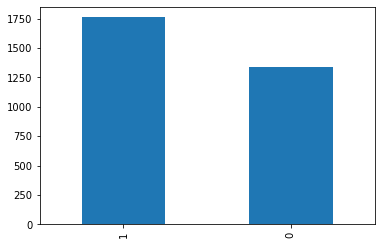

In [118]:
train.car_insurance.value_counts().plot(kind = 'bar')

In [119]:
df = train
t_df = test

In [120]:
train.describe(include='object')

,job_type,marital_status,education_level,communication,last_contact_month,Outcome
count,3102,3102,3102,3102,3102,3102
unique,12,3,4,3,12,4
top,management,married,secondary,cellular,may,MISSING
freq,724,1864,1569,2397,770,2351


In [121]:
t_df.describe(include='object')

,job_type,marital_status,education_level,communication,last_contact_month,Outcome
count,935,935,935,935,935,935
unique,12,3,4,3,12,4
top,management,married,secondary,cellular,may,MISSING
freq,277,541,437,710,237,695


In [122]:
df.head()

,age,job_type,marital_status,education_level,default_or_not,balance_amt,household_insurance,car_loan,communication,last_contact_day,last_contact_month,no_of_contacts,days_passed,prev_attempts,Outcome,car_insurance
0,47.000000,blue-collar,married,primary,0,1112.000000,1,0,cellular,13,may,1,-1,0,MISSING,0
1,46.031442,management,married,tertiary,0,1.312372,0,1,cellular,15,may,3,219,1,other,1
2,36.000000,services,single,MISSING,0,281.000000,1,0,MISSING,16,may,1,-1,0,MISSING,1
3,32.000000,technician,single,secondary,0,540.000000,0,1,cellular,29,jan,1,-1,0,MISSING,1
4,30.000000,admin.,single,secondary,0,315.000000,1,0,cellular,14,may,3,346,4,failure,1


In [123]:
cat_cols = ['job_type','marital_status','education_level','communication','last_contact_month','Outcome']

In [124]:
df = pd.get_dummies(df,columns=cat_cols)
t_df = pd.get_dummies(t_df,columns=cat_cols)

<AxesSubplot:>

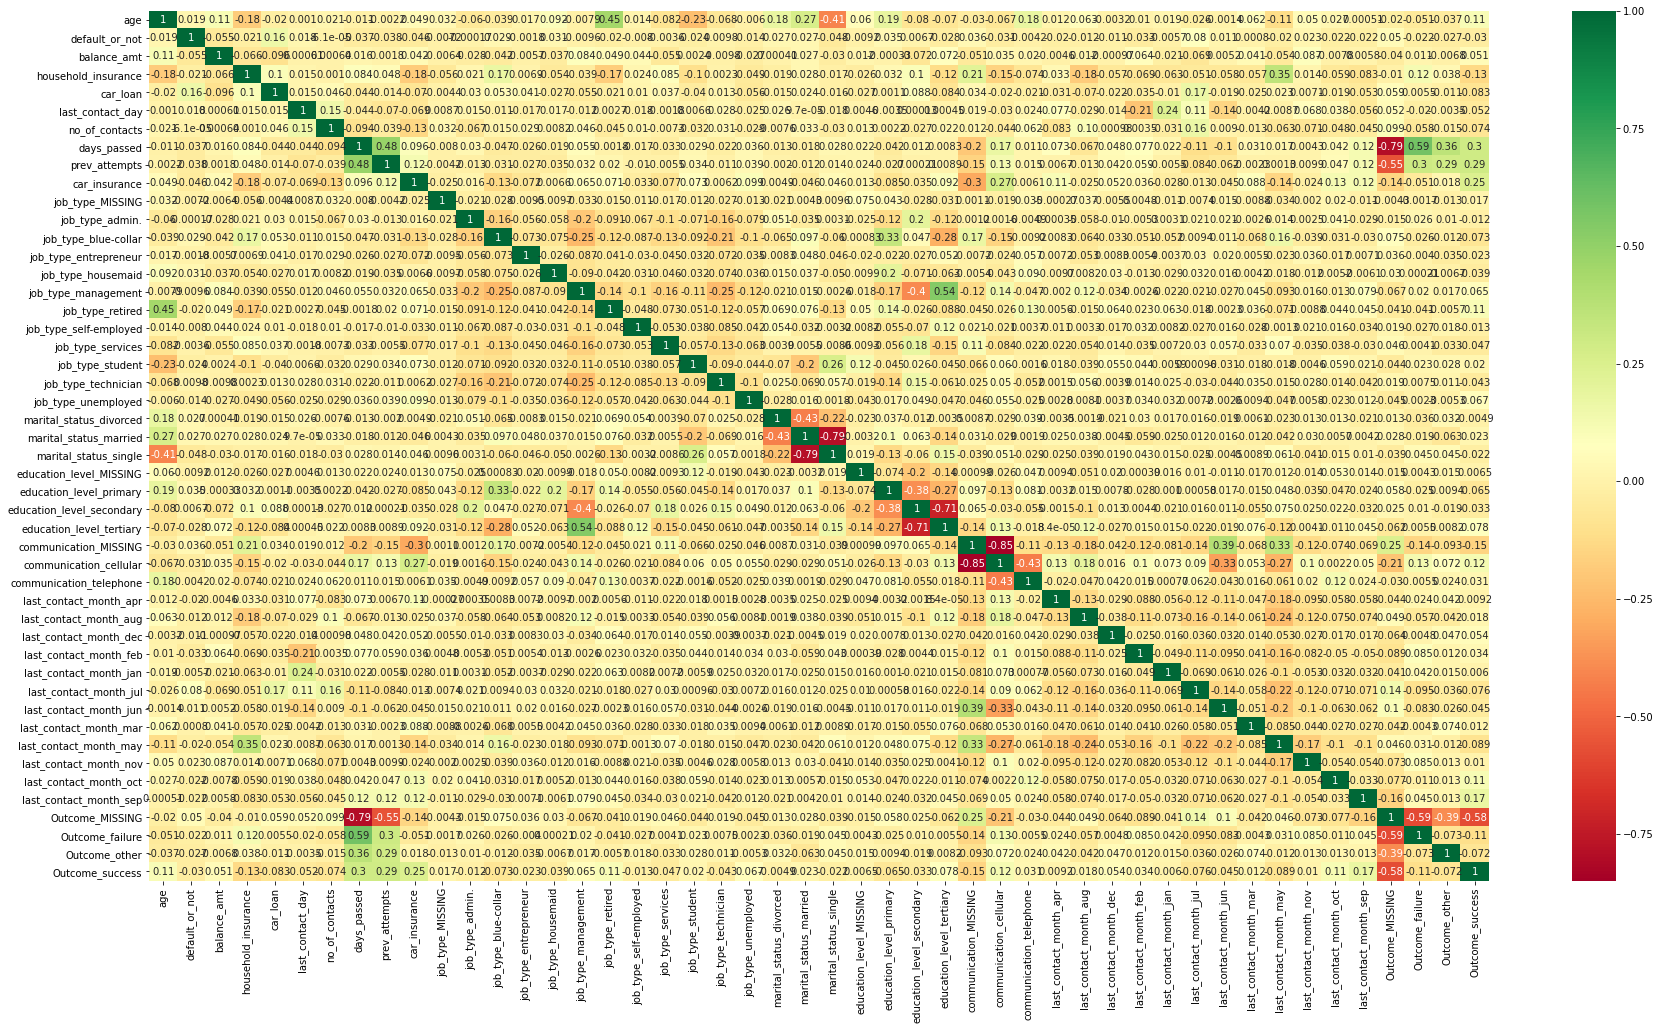

In [125]:
corr_mat = df.corr()
plt.figure(figsize=(30,16))
sns.heatmap(corr_mat, annot=True, cmap="RdYlGn")

In [126]:
df.describe(include='all')

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,car_insurance,...,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,Outcome_MISSING,Outcome_failure,Outcome_other,Outcome_success
count,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,...,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000,3102.000000
mean,41.325847,0.014507,1543.067240,0.465184,0.114442,15.353965,2.356867,52.419084,0.792392,0.567376,...,0.106383,0.021277,0.248227,0.081883,0.031915,0.031593,0.757898,0.099613,0.046099,0.096389
std,11.517698,0.119587,3301.474598,0.498867,0.318399,8.164255,2.594238,109.231364,2.224740,0.495520,...,0.308377,0.144328,0.432054,0.274230,0.175802,0.174941,0.428425,0.299532,0.209734,0.295172
min,18.000000,0.000000,-3058.000000,0.000000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,123.821352,0.000000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,0.000000,589.000000,0.000000,0.000000,15.000000,2.000000,-1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,49.000000,0.000000,1696.000000,1.000000,0.000000,21.000000,3.000000,56.750000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,52587.000000,1.000000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Prediction

In [127]:
y = df["car_insurance"]
X = df.drop("car_insurance",axis=1)

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 21)

In [3]:
log_model = LogisticRegression()
rf_model = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)
d_tree = DecisionTreeClassifier()

In [130]:
log_fit = log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
as1 = accuracy_score(y_test, log_pred)
f1s1 = f1_score(y_test,log_pred)
print("Accuracy is = ",as1)
print("F1 score is = ",f1s1)

Accuracy is =  0.6595059076262084
F1 score is =  0.7283633247643532


In [131]:
d_fit = d_tree.fit(X_train,y_train)
d_pred = d_tree.predict(X_test)
as3=accuracy_score(y_test,d_pred)
f1s3=f1_score(y_test, d_pred)
print("Accuracy is = ",as3)
print("F1 score is = ",f1s3)

Accuracy is =  0.686358754027927
F1 score is =  0.7197696737044146


In [132]:
rf_fit = rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
as2 = accuracy_score(y_test, rf_pred)
f1s2 = f1_score(y_test,rf_pred)
print("Accuracy is = ",as2)
print("F1 score is = ",f1s2)

Accuracy is =  0.7583243823845328
F1 score is =  0.791859389454209


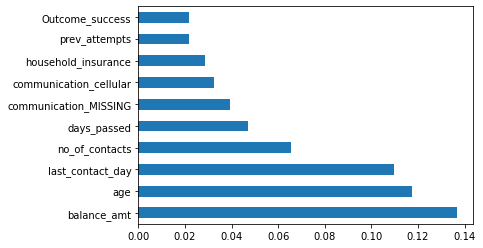

In [133]:
feat_importances = pd.Series(rf_fit.feature_importances_, index=X_train.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [134]:
rf_sfm = SelectFromModel(rf_fit,prefit=True)

In [135]:
X_important_train = rf_sfm.transform(X_train)
X_important_test = rf_sfm.transform(X_test)

In [136]:
clf_important = RandomForestClassifier(n_estimators=10000, random_state=1, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important = clf_important.fit(X_important_train, y_train)

In [137]:
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
rf_imp_ac = accuracy_score(y_test, y_important_pred)
rf_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Model Accuracy:", rf_imp_ac)
print("Limited Features Model F1 Score:", rf_imp_fscore)

Limited Features Model Accuracy: 0.7228786251342643
Limited Features Model F1 Score: 0.7641681901279707


### Final Prediction

In [138]:
t_df.head()

,age,default_or_not,balance_amt,household_insurance,car_loan,last_contact_day,no_of_contacts,days_passed,prev_attempts,job_type_MISSING,...,last_contact_month_jun,last_contact_month_mar,last_contact_month_may,last_contact_month_nov,last_contact_month_oct,last_contact_month_sep,Outcome_MISSING,Outcome_failure,Outcome_other,Outcome_success
0,65.000000,0,20806.0,0,0,8,2,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,36.000000,0,900.0,1,0,15,2,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
2,37.000000,0,6771.0,0,0,7,1,186,1,0,...,0,0,0,0,0,1,0,0,0,1
3,30.065066,0,0.0,0,0,14,2,-1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,41.000000,0,328.0,1,0,29,12,-1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [139]:
prediction = rf_model.predict(t_df)

In [140]:
prediction

array([1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,

In [141]:
prediction_2=pd.Series(prediction)

In [142]:
sub1 = pd.DataFrame({'prediction':prediction_2})

In [143]:
sub1.to_csv("Submission1.csv",index=False)